In [9]:
import pandas as pd
import matplotlib.pyplot as plt

from neuralforecast.utils import AirPassengersDF
from neuralforecast import NeuralForecast
from neuralforecast.models import LSTM, NHITS, RNN

In [3]:
Y_df = AirPassengersDF
Y_df

,unique_id,ds,y
0,1.0,1949-01-31,112.0
1,1.0,1949-02-28,118.0
2,1.0,1949-03-31,132.0
3,1.0,1949-04-30,129.0
4,1.0,1949-05-31,121.0
...,...,...,...
139,1.0,1960-08-31,606.0
140,1.0,1960-09-30,508.0
141,1.0,1960-10-31,461.0
142,1.0,1960-11-30,390.0


In [5]:
horizon = 12

models = [
    LSTM(
        h=horizon,
        max_steps=500, # Number of steps to train
        scaler_type='standard', # Type of scaler to normalize data
        encoder_hidden_size=64, # Defines the size of the hidden state of the LSTM
        decoder_hidden_size=64,), # Defines the size of the hidden state of the LSTM
    NHITS(
        h=horizon, # Forecast horizon
        input_size=2 * horizon, # Length of input sequence
        max_steps=100, # Number of steps to train
        n_freq_downsample=[2, 1, 1]), # Number of frequencies to downsample in each layer
]

Global seed set to 1
Global seed set to 1


In [6]:
nf = NeuralForecast(models=models, freq='M')
nf.fit(df=Y_df)

Epoch 99: 100%|██████████| 1/1 [00:00<00:00, 12.82it/s, v_num=1, train_loss_step=10.30, train_loss_epoch=10.30]


In [7]:
Y_hat_df = nf.predict()

Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 174.31it/s]


In [8]:
Y_hat_df.head()

,ds,LSTM,NHITS
unique_id,,,
1.0,1961-01-31,420.635132,448.037842
1.0,1961-02-28,428.171204,436.236908
1.0,1961-03-31,455.494507,482.302155
1.0,1961-04-30,467.169830,502.821075
1.0,1961-05-31,494.181610,513.303894


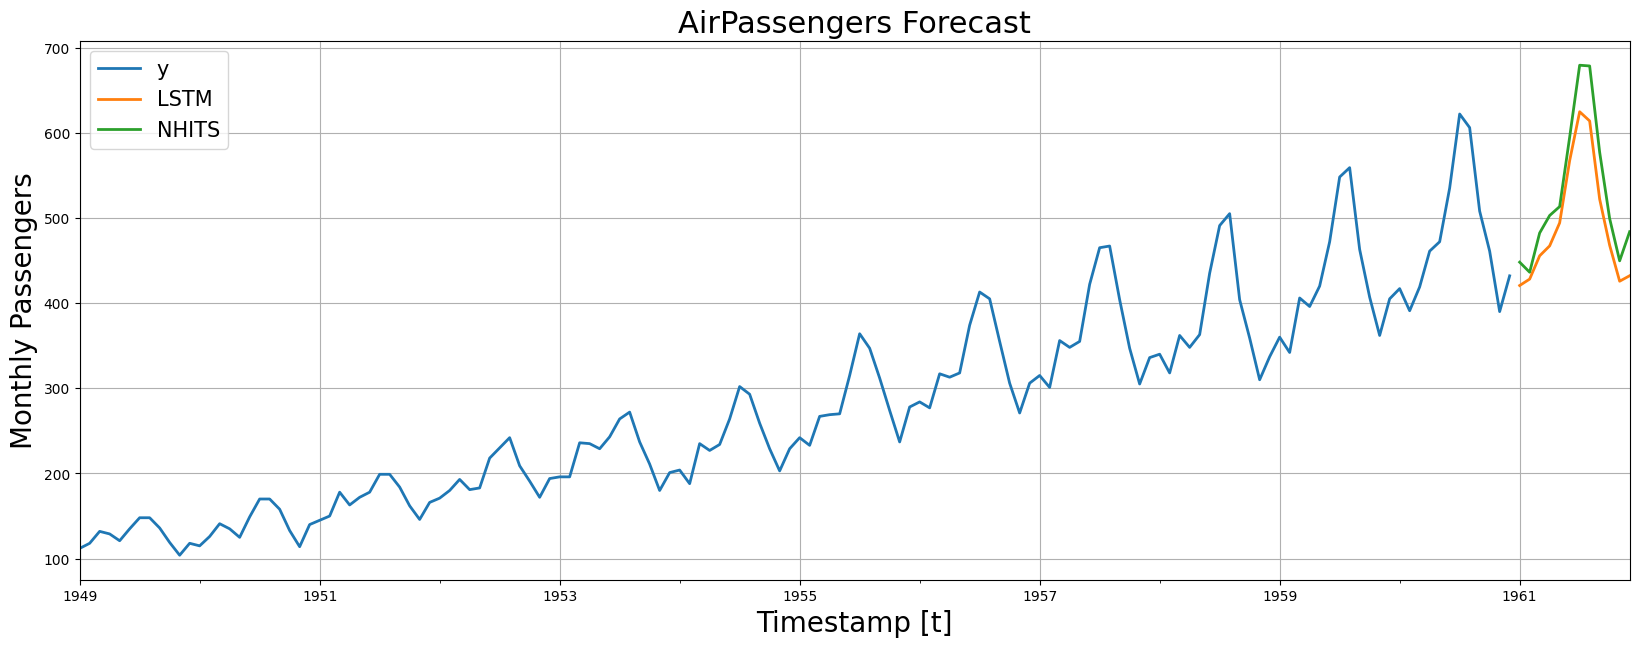

In [10]:
fig, ax = plt.subplots(1, 1, figsize = (20, 7)) # Create figure and axes
plot_df = pd.concat([Y_df, Y_hat_df]).set_index('ds') # Concatenate the train and forecast dataframes
plot_df[['y', 'LSTM', 'NHITS']].plot(ax=ax, linewidth=2) # Plot the train and forecast dataframes

ax.set_title('AirPassengers Forecast', fontsize=22) # Set title
ax.set_ylabel('Monthly Passengers', fontsize=20) # Set y label
ax.set_xlabel('Timestamp [t]', fontsize=20) # Set x label
ax.legend(prop={'size': 15}) # Set legend
ax.grid()